In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.base import BaseEstimator


In [2]:
df = pd.read_csv('prices.csv')

# Nouvelle section

In [3]:
print(df.describe())

                open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       70.836986      70.857109      70.118414      71.543476   
std        83.695876      83.689686      82.877294      84.465504   
min         0.850000       0.860000       0.830000       0.880000   
25%        33.840000      33.849998      33.480000      34.189999   
50%        52.770000      52.799999      52.230000      53.310001   
75%        79.879997      79.889999      79.110001      80.610001   
max      1584.439941    1578.130005    1549.939941    1600.930054   

             volume  
count  8.512640e+05  
mean   5.415113e+06  
std    1.249468e+07  
min    0.000000e+00  
25%    1.221500e+06  
50%    2.476250e+06  
75%    5.222500e+06  
max    8.596434e+08  


In [4]:
print(df.isnull().sum())

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64


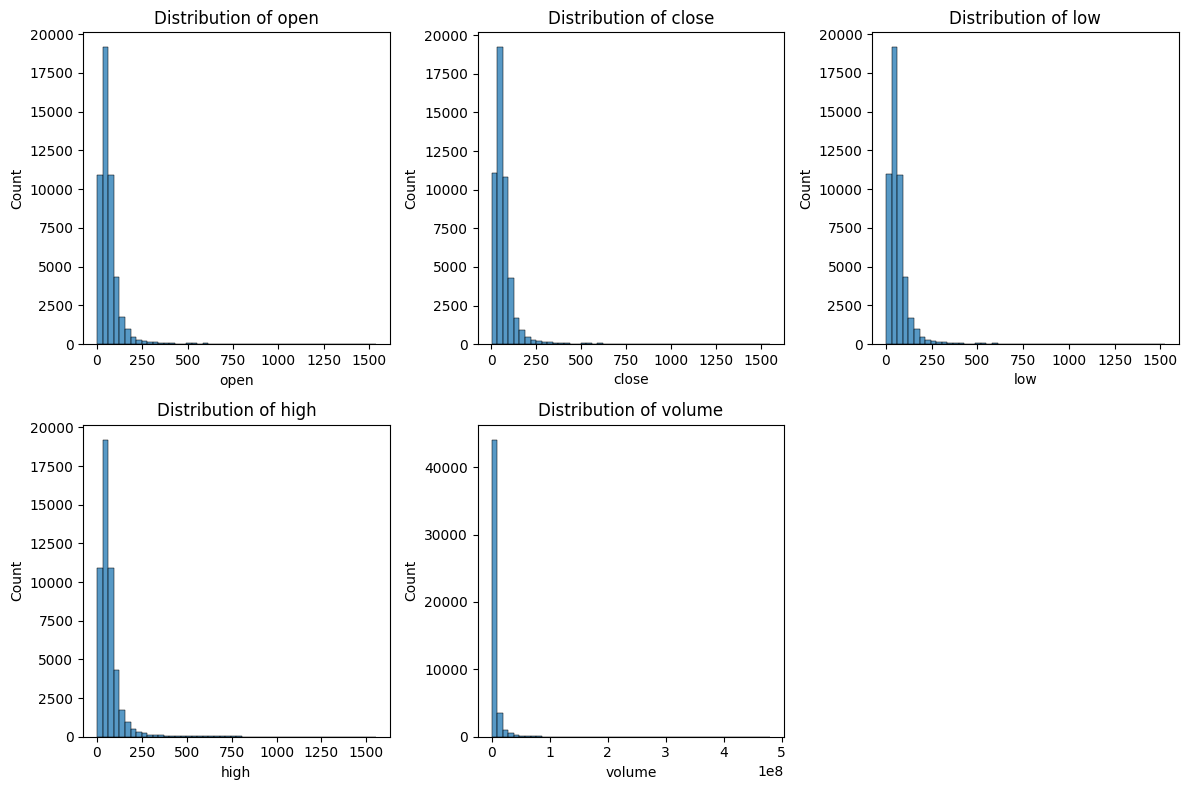

In [5]:


# Sample 50,000 rows (adjust if needed)
sampled_data = df.sample(n=50000, random_state=42)

numeric_cols = sampled_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(sampled_data[col], bins=50)  # Faster without kde
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


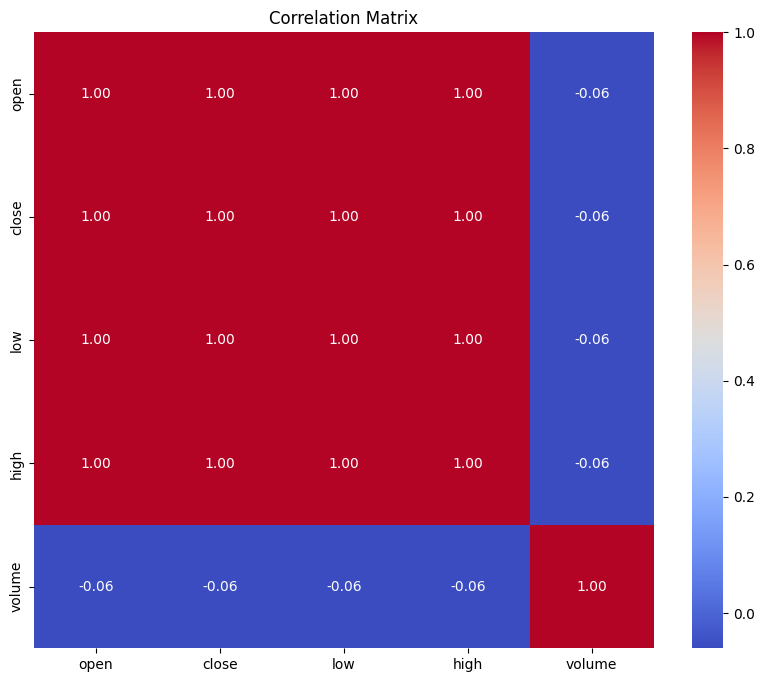

In [6]:


# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix')
plt.show()


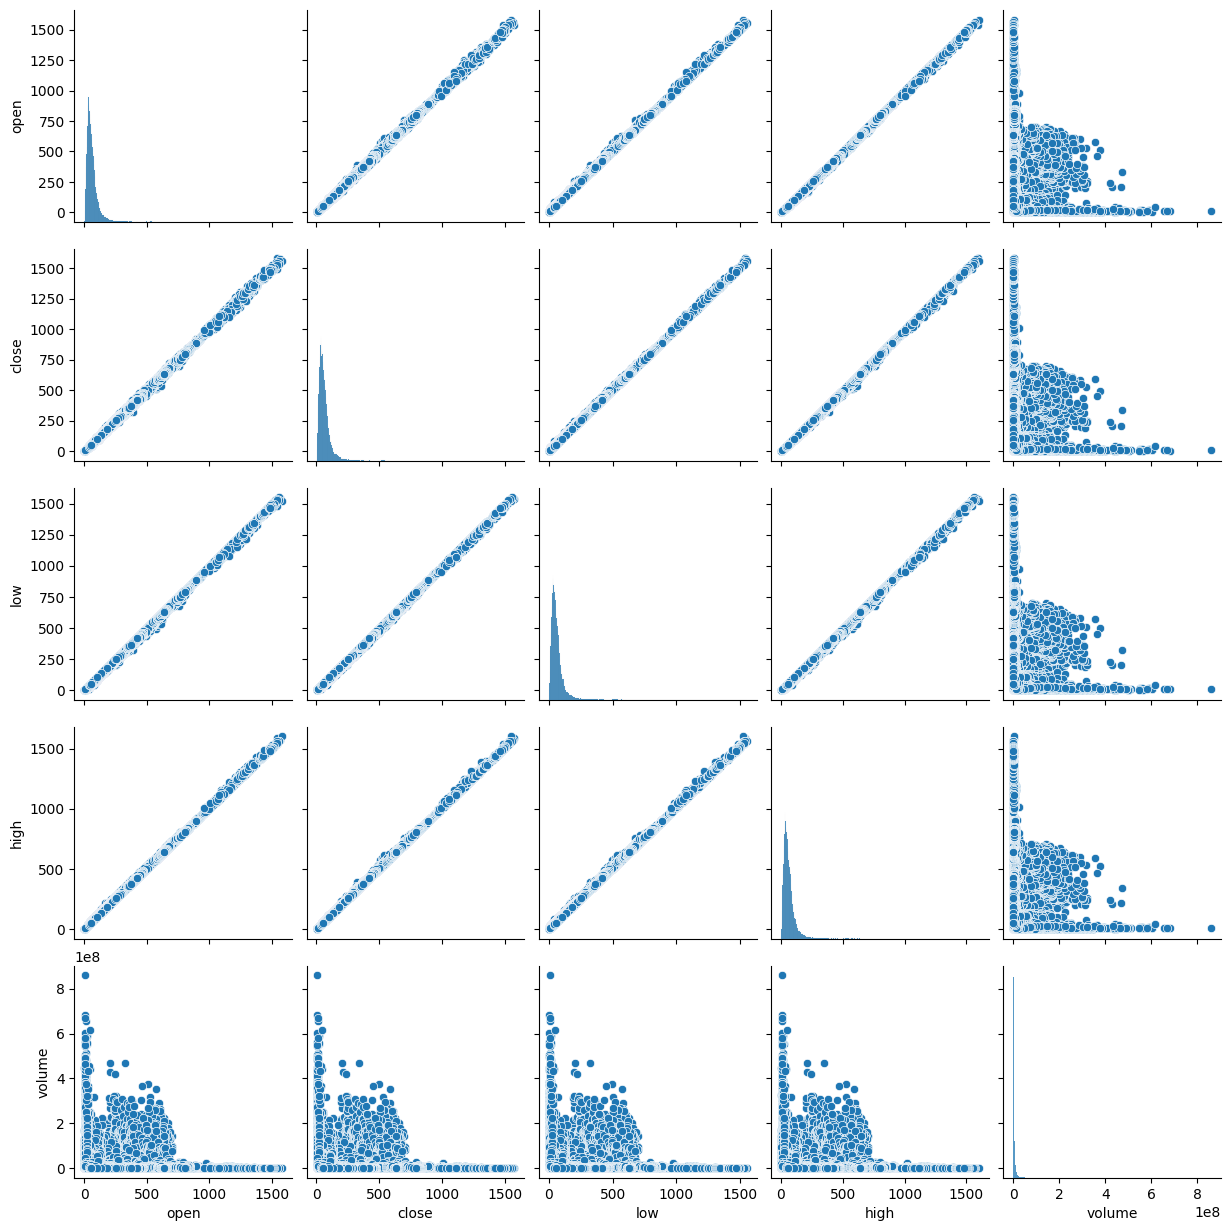

In [7]:
sns.pairplot(df[['open', 'close', 'low', 'high', 'volume']])
plt.show()

**Implementing a PyTorch Regression Model**

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[['open', 'high', 'low', 'volume']].values
y = df['close'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X, scaler_y = StandardScaler(), StandardScaler()
X_train, X_test = scaler_X.fit_transform(X_train), scaler_X.transform(X_test)
y_train, y_test = scaler_y.fit_transform(y_train), scaler_y.transform(y_test)


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

class RegressionDNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

model = RegressionDNN(input_dim=4)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [17]:
train_losses = []
test_losses = []

num_epochs = 100  # Ajuste selon ton besoin

for epoch in range(num_epochs):
    model.train()  # Mode entraînement
    epoch_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()  # Reset gradients
        y_pred = model(X_batch)  # Prédictions
        loss = criterion(y_pred, y_batch)  # Calcul de la perte
        loss.backward()  # Backpropagation
        optimizer.step()  # Mise à jour des poids

        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))  # Stocke la perte moyenne

    # Évaluation sur le jeu de test
    model.eval()  # Mode évaluation
    test_loss = 0

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            test_loss += loss.item()

    test_losses.append(test_loss / len(test_loader))  # Stocke la perte test

    # Afficher la progression toutes les 10 époques
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.6f}, Test Loss: {test_losses[-1]:.6f}")


Epoch 10/100, Train Loss: 0.000148, Test Loss: 0.000086
Epoch 20/100, Train Loss: 0.000115, Test Loss: 0.000066
Epoch 30/100, Train Loss: 0.000104, Test Loss: 0.000079
Epoch 40/100, Train Loss: 0.000096, Test Loss: 0.000072
Epoch 50/100, Train Loss: 0.000095, Test Loss: 0.000060
Epoch 60/100, Train Loss: 0.000094, Test Loss: 0.000098
Epoch 70/100, Train Loss: 0.000090, Test Loss: 0.000084
Epoch 80/100, Train Loss: 0.000085, Test Loss: 0.000081
Epoch 90/100, Train Loss: 0.000090, Test Loss: 0.000069
Epoch 100/100, Train Loss: 0.000087, Test Loss: 0.000092


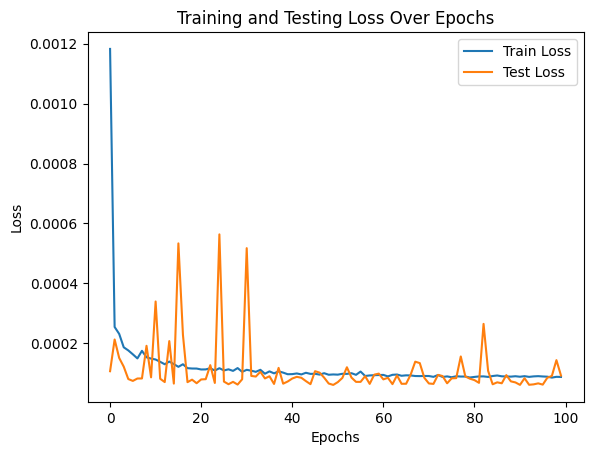

In [18]:


plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Testing Loss Over Epochs')
plt.show()
